# Exercise 44: Electricity storage 

In this exercise you will work an extension of the $\texttt{mBasicInt}$ model, with the extension being the inclusion of a technology with capacity for electricity storage. We will consider _distributed_ storage in which electricity is charged and discharged directly from the grid. 

[**Part 1**](#Part-1:-Analytical-Exercises) goes through some of the analytical conditions characterizing the model and [**Part 2**](#Part-2:-Numerical-Exercises) consists of a numerical version of the model. 

# Part 1: Analytical Exercises

We consider the structure of the $\texttt{mBasicInt}$ with the same notation as in the lecture note of models in energy economics. We let the standard generators in the $\texttt{mBasicInt}$ model be denoted by $i\in\mathcal{I}^E$. Besides the conventional notation, we introduce
- the set of generators $i\in\mathcal{I}^S$, which consists of technologies with capacity for electricity storage. 
- the _control_ variable $Y_{i,h}^d\in[0,q_{i,h}]$, which is the amount of discharged electricity constrained by the generation capacity $q_{i,h}=q_i$.
- the _control_ variable $Y_{i,h}^c\in[0,q_{i,h}]$, which is the amount of charged electricity constrained by the generation capacity $q_{i,h}=q_i$.
- the _state_ variable $S_{i,h}\in[0,\overline{S}_i]$, which is the amount of stored energy constrained by the storage capacity $\overline{S}_i$.
- the parameter $\eta_i\in(0,1)$, which is roundtrip efficiency. In this simplified setting, $\sqrt{\eta}_i$ is both the charge- and discharge efficiency rate.
- the parameter $c_i$, which is the marginal charge/discharge costs of the storage technology.

Compared to the standard social planner problem of the $\texttt{mBasicInt}$ model (and excluding fixed costs), the extensions are highligted in $\color{blue}{\text{blue}}$ as:
\begin{align}
    \max_{E_{i,h},\color{blue}{Y_{i,h}^d,Y_{i,h}^c},D_h} W &= \sum_{h=1}^{H}\left(u\cdot D_h-\sum_{i\in\mathcal{I}^E}c_i\cdot E_{i,h}\color{blue}{-\sum_{i \in \mathcal{I}^S} c_i\left(Y^d_{i,h}+Y^c_{i,h}\right)}\right) \tag{1.1.1} \\
    & \text{s.t.} \\
    \sum_{i\in\mathcal{I}^E}E_{i,h} \color{blue}{+ \sum_{i\in\mathcal{I}^S} Y_{i,h}^d} & = D_h\color{blue}{+\sum_{i\in\mathcal{I}^S} Y_{i,h}^c} \tag{1.1.2} \\
    D_h &\in [0,L_h] \tag{1.1.3} \\
    E_{i,h} & \in [0,q_{i,h}], \quad \forall i\in\mathcal{I}^E \tag{1.1.4} \\
    \color{blue}{S_{i,h}} & \color{blue}{=S_{i,h-1}+\sqrt{\eta_i}Y_{i,h}^c-\frac{Y_{i,h}^c}{\sqrt{\eta_i}},} \quad \color{blue}{\forall i\in\mathcal{I}^S} \tag{1.1.5} \\
    \color{blue}{Y_{i,h}^d} & \color{blue}{\in [0,q_{i,h}],} \quad \color{blue}{\forall i\in\mathcal{I}^S} \tag{1.1.6} \\
    \color{blue}{Y_{i,h}^c} & \color{blue}{\in[0,q_{i,h}],} \quad \color{blue}{\forall i\in\mathcal{I}^S} \tag{1.1.7} \\
    \color{blue}{S_{i,h}} & \color{blue}{\in[0,\overline{S}_{i}],} \quad \color{blue}{\forall i\in\mathcal{I}^S} \tag{1.1.8} \\
    \color{blue}{S_{i,H}} & \color{blue}{=S_{i,0},} \quad \color{blue}{\forall i\in\mathcal{I}^S} \tag{1.1.9} 
\end{align}

# E1.1

__Describe the blue terms in system of equations in (1.1).__

___
___Answer:___
- In __(1.1.1)__, the blue terms are the social costs of using the storage technologies. Note that the social planner also optimizes welfare with respect to the charge and discharge decisions.
- In __(1.1.2)__, the blue term on the left-hand side is the additional supply (discharge) from the storage technologies, and the blue term on the right-hand side is the additional demand (charge) from the storage technologies. Note that using this equilibrium condition implies that we are considering _distributed_ storage, in which electricity is charged from and discharged to the grid directly.
- __(1.1.5)__ is the law of motion (or equivalently) the transition equation of for the level of stored electricity.
- __(1.1.6)__ is the domain constraint on the amount of discharged electricity.
- __(1.1.7)__ is the domain constraint on the amount of charged electricity.
- __(1.1.8)__ is the domain constraint on the amount of stored electricity.
- __(1.1.9)__ is a terminal condition, stating the stored level in the terminal period $(S_H)$ should equal the _initial condition_ for the amount of stored energy $(S_0)$. Note that this implies _cyclicality_ in which the end-horizon in similar to first hour of the model.

# E1.2

__Set up the Lagrangian for the social planner problem in [**E1.1**](#E1.2).__

_Hint: Recall that the Lagrangian of the $\texttt{mBasicInt}$ is given by:_

\begin{align}
    \mathcal{L} &= \sum_h\left(u\cdot D_h-\sum_{i\in\mathcal{I}^E}c_i\cdot E_{i,h}\right) \color{white}{-\sum_{i \in \mathcal{I}^E} \text{FOM}\cdot q_i}  \\
    & + \sum_h\left(\Lambda_h^E+\Theta_h^D+ \sum_{i\in\mathcal{I}^E}\Theta_{i,h}^E \right) \tag{1.2.1} \\ 
    \Lambda_h^E&\equiv \lambda_h^E\left(\sum_{i\in\mathcal{I}^E} E_{i,h}-D_h\right) \tag{1.2.2} \\
    \Theta_h^D &\equiv \underline{\theta}_h^DD_h+\overline{\theta}_h^D\left(L_h-D_h\right) \tag{1.2.3} \\ 
    \Theta_{i,h}^E&\equiv \underline{\theta}_{i,h}^EE_{i,h}+\overline{\theta}_{i,h}^E\left(q_{i,h}-E_{i,h}\right), \qquad \forall i\in\mathcal{I}^E \tag{1.2.4}
\end{align}

___
___Answer:___

Extending the system of equations in __(1.2)__:

\begin{align}
    \mathcal{L} &= \sum_h\left(u\cdot D_h-\sum_{i\in\mathcal{I}^E}c_i\cdot E_{i,h}\color{blue}{-\sum_{i \in \mathcal{I}^S} c_i\left(Y^d_{i,h}+Y^c_{i,h}\right)}\right) - \sum_{i \in \mathcal{I}^E} \text{FOM}\cdot q_i  \\
    & + \sum_h\left(\Lambda_h^E+\Theta_h^D+ \sum_{i\in\mathcal{I}^E}\Theta_{i,h}^E \right) \tag{1.2.1} \\ 
    & \color{blue}{+\sum_h\sum_{i\in\mathcal{I}^S}\left(\Lambda_{i,h}^S+\Theta_{i,h}^d+\Theta_{i,h}^c+\Theta_{i,h}^S\right)} \\
    \Lambda_h^E&\equiv \lambda_h^E\left(\sum_{i\in\mathcal{I}^E} E_{i,h}-D_h\color{blue}{+\sum_{i \in \mathcal{I}^S} \left(Y^d_{i,h}-Y^c_{i,h}\right)}\right) \tag{1.2.2} \\
    \Theta_h^D &\equiv \underline{\theta}_h^DD_h+\overline{\theta}_h^D\left(L_h-D_h\right) \tag{1.2.3} \\ 
    \Theta_{i,h}^E&\equiv \underline{\theta}_{i,h}^EE_{i,h}+\overline{\theta}_{i,h}^E\left(q_{i,h}-E_{i,h}\right), \qquad \forall i\in\mathcal{I}^E \tag{1.2.4} \\
    \color{blue}{\Lambda_{i,h}^S}&\color{blue}{\equiv \lambda_{i,h}^S\left(S_{i,h-1}+\sqrt{\eta}_i Y_{i,h}^C-\frac{Y_{i,h}^d}{\sqrt{\eta}_i}-S_{i,h}\right),}  \qquad \color{blue}{\forall i\in\mathcal{I}^S} \tag{1.2.5} \\
    \color{blue}{\Theta_{i,h}^d} &\color{blue}{\equiv \underline{\theta}_{i,h}^d Y_{i,h}^d+\overline{\theta}_{i,h}^d \left(q_{i,h}-Y^d_{i,h}\right),}  \qquad \color{blue}{\forall i\in\mathcal{I}^S} \tag{1.2.6} \\
    \color{blue}{\Theta_{i,h}^c} &\color{blue}{\equiv \underline{\theta}_{i,h}^c Y_{i,h}^c+\overline{\theta}_{i,h}^c \left(q_{i,h}-Y^c_{i,h}\right),}  \qquad \color{blue}{\forall i\in\mathcal{I}^S} \tag{1.2.7} \\
    \color{blue}{\Theta_{i,h}^S} &\color{blue}{\equiv \underline{\theta}_{i,h}^S S_{i,h}+\overline{\theta}_{i,h}^S \left(\overline{S}_{i}-S_{i,h}\right),}  \qquad \color{blue}{\forall i\in\mathcal{I}^S} \tag{1.2.8} \\
\end{align}

# E1.3

__Show that the first-order conditions for optimal electricity storage are given by__
\begin{align}
    \frac{\partial \mathcal{L}}{\partial Y^d_{i,h}}&=0: &-c_i+\lambda_{i,h}^E-\frac{\lambda_{i,h}^S}{\sqrt{\eta_i}}+\underline{\theta}_{i,h}^d-\overline{\theta}_{i,h}^d&=0 \tag{1.3.1}\\
    \frac{\partial \mathcal{L}}{\partial Y^c_{i,h}}&=0: &-c_i-\lambda_{i,h}^E+\sqrt{\eta_i}\lambda_{i,h}^S+\underline{\theta}_{i,h}^c-\overline{\theta}_{i,h}^c&=0 \tag{1.3.2}\\
    \frac{\partial \mathcal{L}}{\partial S_{i,h}}&=0: &-\lambda_{i,h}^S +\underline{\theta}_{i,h}^S-\overline{\theta}_{i,h}^S +\lambda_{i,h+1}^S &= 0 \tag{1.3.3}\\
    \frac{\partial \mathcal{L}}{\partial \lambda_{i,h}^S}&=0: &S_{i,h} - S_{i,h-1}-\sqrt{\eta_i} Y_{i,h}^c+\frac{Y_{i,h}^d}{\sqrt{\eta_i}} &=0 \tag{1.3.4}
\end{align}
__and interpret.__

___
___Answer:___

Equations __(1.3.1)__, __(1.3.2)__, and __(1.3.4)__ are straightforward. For equation __(1.3.3)__, 
- the first term $(-\lambda_{i,h}^S)$ is given by $\frac{\partial \Lambda_{i,h}^S}{\partial S_{i,h}}$. 
- the next two terms $(\underline{\theta}_{i,h}^S-\overline{\theta}_{i,h}^S)$ are given by $\frac{\partial \Theta_{i,h}^S}{\partial S_{i,h}}$.
- the final term $(\lambda_{i,h+1}^S)$ is given by $\frac{\partial \Lambda_{i,h+1}^S}{\partial S_{i,h}}$

The intuitions for the different equations are:
- Eq. __(1.3.1)__:
    - $\lambda_{i,h}^E-c_i$ are the marginal profits of dispatching today.
    - $-c_i+\lambda_{i,h}^E+\underline{\theta}_{i,h}^d-\overline{\theta}_{i,h}^d$ is exactly the same expression as for standard plants' generation decision.
    - $\lambda_{i,h}^S$ is the (shadow) value of stored energy.
    - $\lambda_{i,h}^S/\sqrt{\eta_i}$ are the opportunity costs of dispatching today: For each unit dipatched today, the society loses $1/\sqrt{\eta_i}$ units in storage, which is valued at $\lambda_{i,h}^S$.
    - Hence, in optimum the marginal profits of dispatching electricity today should be equalized with the oppertunity cost of dispatching today.
- Eq. __(1.3.2)__:
    - $-\lambda_{i,h}^E-c_i$ are the marginal costs of dispatching today.
    - $-c_i-\lambda_{i,h}^E+\underline{\theta}_{i,h}^d-\overline{\theta}_{i,h}^d$is similar to the expression as for standard plants' generation decision only that now electricity is purchased and not sold.
    - $\lambda_{i,h}^S$ is the (shadow) value of stored energy.
    - $\sqrt{\eta_i}\lambda_{i,h}^S$ are the marginal benefits of charging today: For each unit charged, society gains $\sqrt{\eta_i}$ in storage, which is valued at the $\lambda_{i,h}^S$.
    - Hence, in optimum the marginal costs of charging electricity today should be equalized with marginal benefits.
- Eq. __(1.3.3)__ is a first-order linear difference equation, describing the value of stored energy:
     - $\overline{\theta}_{i,h}^S-\underline{\theta}_{i,h}^S$ are the shadow costs of reaching the storage capacity constraints: E.g, when storage capacity is scarce and $\overline{\theta}_{i,h}^S>0$ it lowers the value of stored energy and provides incentive to dispatch today.
    - $\lambda_{i,h+1}^S$ is the value of stored energy in hour $h+2$ seen from hour $h$. Ensures we are seeing all the way to the end horizon.
- Eq. __(1.3.4)__ is just the law of motion for stored electricity repeated.

# E1.4

__Show that the marginal economic value of power storage is given by__

\begin{align}
    \forall i\in\mathcal{I}^S&: &\frac{\partial \mathcal{L}}{\partial q_{i}}&=\sum_h\left(\overline{\theta}_{i,h}^d+\overline{\theta}_{i,h}^c\right)\gamma_{i,h},\tag{1.4.1.1} \\
    &&\overline{\theta}_{i,h}^d &\equiv\max\left\{\lambda_{i,h}^E-c_i-\frac{\lambda_{i,h}^S}{\sqrt{\eta_i}},0\right\} \tag{1.4.1.2} \\
    &&\overline{\theta}_{i,h}^c &\equiv\max\left\{\sqrt{\eta_i}\lambda_{i,h}^S-\left(\lambda_{i,h}^E+c_i\right),0\right\} \tag{1.4.1.3} \\
\end{align}

__and that the marginal economic value of energy storage is given by__
\begin{align}
    \forall i\in\mathcal{I}^S&: &\frac{\partial \mathcal{L}}{\partial \overline{S}_{i}}&=\sum_h\overline{\theta}_{i,h}^S, \tag{1.4.2.1}\\
    &&\overline{\theta}_{i,h}^S &\equiv\max\left\{\lambda_{i,h+1}^S-\lambda_{i,h}^S,0\right\} \tag{1.4.2.2} \\
\end{align}

__Interpret the expression in (1.4.2.2).__

_Hint: Recall that whenever an upper bound constraint is binding, the shadow price on the lower bound constraint will necessarily be zero._

___
___Answer:___

Eq. __(1.4.1.1)__ follows directly from partially differentiating the Lagrangian function in __(1.2.1)__ with respect to $q_i$ remembering that $q_{i,h}=\gamma_{i,h}q_i$. Note that for storage technologies, $\gamma_{i,1}=\ldots=\gamma_{i,h}=\ldots=\gamma_{i,H}=1$ because it is a dispatchable technology. We furthermore have, that
- $\overline{\theta}_{i,h}^d$ measures the scarcity unit rents on the discharging capacity.
    - Given that $\overline{\theta}_{i,h}^d$ is shadow price on the upper bound $(q_{i,h})$ on $Y_{i,h}^d$, then $\overline{\theta}_{i,h}^d>0$ when $Y_{i,h}^d=q_{i,h}$. 
    - Following eq. __(1.3.1)__ and the intuition provided in [**E1.3**](#E1.3), this implies that $\overline{\theta}_{i,h}^d>0$ whenever $\lambda_{i,h}^E-c_i>\frac{\lambda_{i,h}^S}{\sqrt{\eta_i}}$, hence the expression in __(1.4.1.2)__.
- $\overline{\theta}_{i,h}^c$ measures the scarcity unit rents on the charging capacity.
    - Given that $\overline{\theta}_{i,h}^c$ is shadow price on the upper bound $(q_{i,h})$ on $Y_{i,h}^c$, then $\overline{\theta}_{i,h}^c>0$ when $Y_{i,h}^c=q_{i,h}$. 
    - Following eq. __(1.3.2)__ and the intuition provided in [**E1.3**](#E1.3), this implies that $\overline{\theta}_{i,h}^c>0$ whenever $\sqrt{\eta_i}\lambda_{i,h}^S>\left(\lambda_{i,h}^E+c_i\right)$, hence the expression in __(1.4.1.3)__.
    
Eq. __(1.4.2.1)__ follows directly from partially differentiating the Lagrangian function in __(1.2.1)__ with respect to $\overline{S}_i$. We note that $\overline{\theta}^S_{i,h}$ measure the scarcity unit rents on the energy storage capacity $\overline{S}_i$. Given that $\overline{\theta}^S_{i,h}$ is the shadow price on the upper bound constraint $S_{i,h}\leq \overline{S}_i$, the $\overline{\theta}^S_{i,h}>0$ whenever $S_{i,h}=\overline{S}_i$. Following eq. __(1.3.3)__, this is the case whenever  $\lambda_{i,h+1}^S-\lambda_{i,h}^S$, i.e. when the value of stored energy is higher tomorrow than today. In this case, it is optimally to fill the reservoir today to have as much stored energy available tomorrow.

# Part 2: Numerical Exercises

In the second part of this exercise we will work with a numerical version of the model introduced in [**Part 1**](#Part-1:-Analytical-Exercises). We start by importing basic packages and specifying where to place figures.

In [1]:
%run ../stdPackages.ipynb
from pyDbs import *
from IPython.display import Image
figs_path = os.path.join(d['curr'],'Figs')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The data we are using to parameterize the model is located at

In [2]:
path_to_data = os.path.join(d['curr'],'E44','Data','E44_Data.xlsx')
print(path_to_data)

C:\Users\xnh825\Documents\GitHub\EnergyEconomicsE2023\Exercises\E44\Data\E44_Data.xlsx


The table below translates the names used in the data to the symbols used in the model. 

| Name in excel file | Model symbol |
|:--------|:--------:|
| id | $i$ | 
| BFt | $j$ |
| h | $h$ |
|  FuelMix   |  $\mu_{i,j}$   |
|  GeneratingCapacity   | $q_i$   |
|  OtherMC   | $c_i^{oth}$   |
| FuelPrice | $p_j^f$ |
| EmissionIntensity | $\phi_j$ |
| MWP | $\mu$ |
| LoadVariation $\times$ Load | $D_h$ |
| CapVariation | $\gamma_{i,h} $ |
| sCap | $\overline{S}_i$ |
| effS | $\sqrt{\eta_i}$ |

Note that $c$ is also an index for the consumer type in the data file. In the model in [**Part 1**](#Part-1:-Analytical-Exercises), however, there is only a single representative consumer. But since $c=c1$ always, this is equivalent.

The following section imports the data:

In [3]:
kwargs = {'variables': ['Fundamentals', 'Load', 'Generators_Other'],
        'maps': ['Generators_Categories','hMaps'],
        'variable2D': ['HourlyVariation','Generators_FuelMix'],
        'scalars': ['Scalars']}

db = read.dbFromWB(path_to_data, kwargs)
readSets(db)

# E2.1

Recall that the social planner problem in the system of equations in __(1.1)__ is a linear programming problem an can be expressed on the form

\begin{align} 
    &\min_{x} \ c^T\cdot x \tag{2A}\\ 
    &l\leq x\leq u, \tag{2B} \\
    &A_{eq}\times x  = b_{eq} \tag{2C}\\ 
\end{align}
where: 
* $x$ is the vector of choice variables of length ($N$).
* $c, l, u$ are coefficient vectors of the same length ($N$).
* $b_{eq}, b_{ub}$ are coefficient vectors of lengths $N_{eq}, N_{ub}$, 
* and $A_{eq}, A_{ub}$ are coefficient matrices of sizes $(N_{eq}\times N)$ and $(N_{ub} \times N)$ respectively.


In the `py`-folder for this exercise, the modelclass we will be working with is located in `ModelClass.py`. Under the `mSimple` class (post line 91), you will fill in the missing lines of code to extend the $\texttt{mBasicInt}$ model to include energy storage. 


_c-vector:_  
__For the c-vector in (2A) fill in coefficient related to the discharge $(Y_{i,h}^d)$ and charge $(Y_{i,h}^c)$ decisions in the c-property of__ `mSimple`:
```python
    @property
    def c(self):
        return [{'varName': 'Generation',
                 'value': adjMultiIndex.bc(self.db['mc'], self.globalDomains['Generation']), 
                 'conditions': getTechs(['Standard'],self.db)},
                {'varName': 'HourlyDemand',
                 'value':-adjMultiIndex.bc(self.db['MWP'], self.globalDomains['HourlyDemand'])},
                {'varName': 'discharge',
                 'value': ...Fill in here...,
                 'conditions': getTechs('Storage',self.db)},
                {'varName': 'charge',
                 'value': ...Fill in here...,
                 'conditions': ...Fill in here...}]
```
_u-vector:_   
__For the u-vector in (2B) fill in upper bound related to the discharge $(Y_{i,h}^d)$, charge $(Y_{i,h}^c)$, and storage $(S_{i,h})$ decisions in the u-property of `mSimple`:__
```python
    @property
    def u(self):
        return [{'varName': 'Generation', 
                 'value': adjMultiIndex.bc(self.hourlyGeneratingCap, self.globalDomains['Generation']), 
                 'conditions': getTechs(['Standard'],self.db)},
                {'varName': 'HourlyDemand', 'value': self.hourlyLoad_c},
                {'varName': 'stored', 
                 'value': adjMultiIndex.bc(self.db['sCap'], self.globalDomains['stored'])},
                {'varName': 'discharge', 
                 'value': ...Fill in here...,
                 'conditions': getTechs('Storage',self.db)},
                {'varName': 'charge',
                 'value': Fill in here..., 
                 'conditions': Fill in here...}]
```

__Finally, make sure your code is correct by solving for the baseline scenario, where this is no storage__:

In [4]:
from py.ModelClass import *
m = mSimple(db)
m()

Solution status 0: Optimization terminated successfully. (HiGHS Status 7: Optimal)


Save solution for later:

In [5]:
base_db = m.db.copy()

In the following, we will aggregate the fuel types to the following types:

In [6]:
agg_BFt = {
    'Fueloil':'Oil','Gasoil':'Oil', 
    'Straw':'Biomass','WoodPellets':'Biomass','WoodChips':'Biomass','WoodWaste':'Biomass',
    'Biogas':'Other Bio','BioOil':'Other Bio',
    'Coal':'Coal',
    'NatGas':'Natural gas',
    'Waste':'Waste'
}

## E2.2

Below, the average merit order curve, the average marginal inverse fuel effiency, and the average marginal CO$_2$ intensity is illustrated.

**Describe the supply curve.**

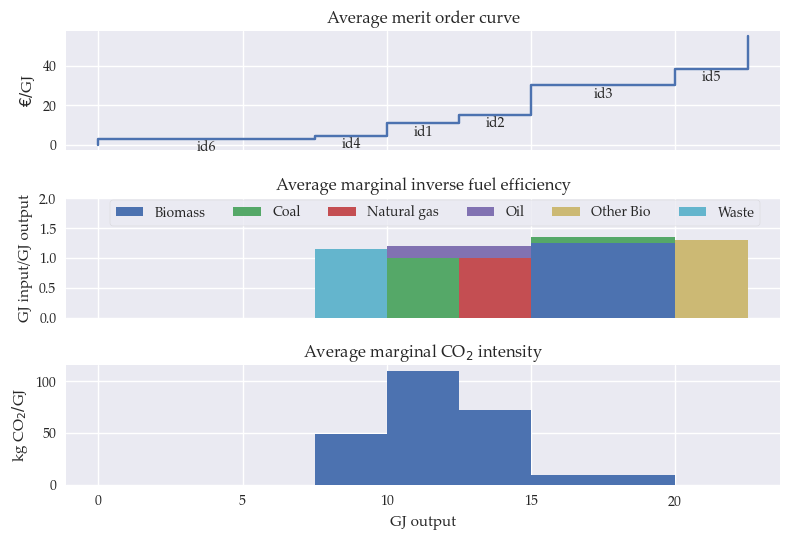

In [9]:
Image(os.path.join(figs_path,'E2.2_sol.png'))

_Note: The code for generating the figure is:_

In [10]:
%%capture
# Settings
ϵ=np.finfo(float).eps*1e10
lower_point=0
upper_point=m.db['MWP']*1.1

# Make dataframe
df_fuelineff = m.db['FuelMix'].rename(agg_BFt,level='BFt').groupby(['id','BFt']).sum().unstack('BFt').rename_axis(None,axis=1)
df = pd.concat(
    [m.hourlyGeneratingCap.groupby('id').agg('mean').rename('q').astype(float),m.db['mc'].rename('p').astype(float)]+
    [df_fuelineff]+
    [plantEmissionIntensity(m.db).xs('CO2',level='EmissionType').rename('m').mul(1000)]
    ,axis=1
).fillna(0)

# Sort and aggregate
df = df.sort_values(['p'])
df['q_cs'] = df['q'].transform('cumsum')

# Add upper points for step plotting
df_up = df.copy()
df_up['q_cs'] = df_up['q_cs']+ϵ
df_up['p'] = df_up['p'].shift(-1).fillna(upper_point)
df_up[df_fuelineff.columns.values] = df_up[df_fuelineff.columns.values].shift(-1)
df_up['m'] = df_up['m'].shift(-1)
df = pd.concat([df,df_up],axis=0).sort_values(['p','q_cs'])
df['q_diff'] = df['q_cs'].diff().div(2)
df['q_mean'] = df['q_cs']-df['q_diff']

# Now plot
fig, ax = plt.subplots(ncols=1,nrows=3,sharex=True,sharey=False)

# Merit order cuve:
df.set_index(['q_cs'])['p'].plot(ax=ax[0],ylabel=r'$€/$GJ',title='Average merit order curve')
for i in adj.rc_pd(m.db['id'],getTechs(['Standard'],m.db)):
    df_tmp = df.loc[i].copy()
    ax[0].text(x=df_tmp.iloc[0]['q_mean'],y=df_tmp.iloc[0]['p']-1,s=i,ha='center',va='top')

# Marginal fuel inefficiency
df.set_index(['q_cs'])[df_fuelineff.columns].plot(kind='area',linewidth=0,ax=ax[1],legend=False,stacked=True,ylabel='GJ input/GJ output',title='Average marginal inverse fuel efficiency')
ax[1].set_ylim(top=2)
fig.legend(handles=ax[1].get_legend_handles_labels()[0],loc='upper center', ncol=len(df_fuelineff.columns), frameon=True, bbox_to_anchor=(0.55,0.64))

# Marginal emission coefficient
df.set_index(['q_cs'])['m'].plot(kind='area',linewidth=0,ax=ax[2],legend=False,xlabel='GJ output',ylabel=r'kg CO$_2/$GJ',title=r'Average marginal CO$_2$ intensity')

fig.tight_layout()
fig.savefig(f"{figs_path}\\E2.2_sol.png", edgecolor='k',bbox_inches='tight')

___
___Answer:___

- `id6` is a wind farm with a marginal costs of generation of 3 $€/$GJ. The installed/theoretical capacity if 25 but the average/practical generating capacity is only around 7.5.
- `id4` is a relatively cheap waste incineration plant, which is associted with CO$_2$ emissions.
- `id1` is next on the merit order curve and is predominately a coal plant. Even though it is not the most fuel inefficient generator it has by far the largest emission intensity.
- `id2` is a predominately a natural-gas fired plant and has the second highest emission intensity.
- `id3` is a biomass-fired plant associated with moderate CO$_2$ emissions since it also uses a small input of coal.
- `id5` is the last generator on the merit order curve and it is relatively costly mainly due to high fuel costs. 

## E2.3

**Describe the residual demand curve and the prices.**

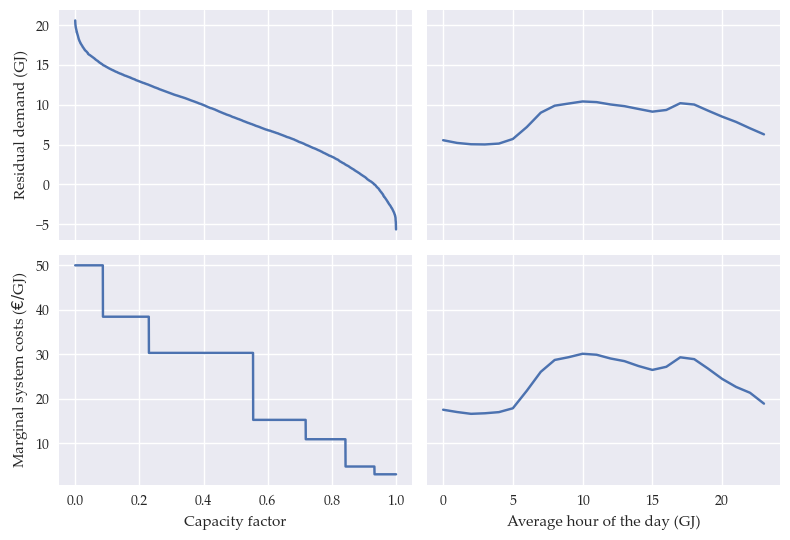

In [14]:
Image(os.path.join(figs_path,'E2.3_sol.png'))

_Note: The code for generating the figure is:_

In [13]:
%%capture
# Make dataframe
int_id = adj.rc_pd(m.db['id2hvt'], pd.Index(['Wind','Solar'], name = 'hvt')).droplevel('hvt')
df_sort =  pd.concat([
    adj.rc_pd(m.hourlyGeneratingCap,int_id).groupby('h').sum().rename('E').astype(float),
    m.hourlyLoad.rename('L').astype(float),
    m.db['marginalSystemCosts'].rename('p').astype(float)
],axis=1)

# Calculate residual demand
df_sort['resd'] = df_sort['L']-df_sort['E']

# Sort dataframe
df_sort = df_sort.sort_values(['resd'],ascending=False).reset_index()
df_sort.index = df_sort.index/len(df_sort)

# Make new dataframe with time mappings
df_h = df_sort.merge(m.db['h2HourOfTheDay'].to_frame(index=False))

# Aggregate for average hour of the day
df_h = df_h.groupby('HourOfTheDay')[['resd','p']].mean()

# Make plot
fig, ax = plt.subplots(nrows=2,ncols=2,sharey='row',sharex='col')

df_sort['resd'].plot(ax=ax[0,0],ylabel=r'Residual demand (GJ)')
df_sort['p'].plot(ax=ax[1,0],ylabel=r'Marginal system costs ($€/$GJ)',xlabel='Capacity factor')
df_h['resd'].plot(ax=ax[0,1])
df_h['p'].plot(xlabel='Average hour of the day (GJ)',ax=ax[1,1])

fig.tight_layout()
fig.savefig(f"{figs_path}\\E2.3_sol.png", edgecolor='k',bbox_inches='tight')

___
___Answer:___

In the baseline scenario - where this is no capacity for electricity storage - there is a surplus of wind electricity in around 7% of the year (upper left figure). This surplus electricity gets curtailed in equilibrium. Comparing the upper left panel with the lower left figure, we see that prices of the year closely follows the share of the residual demand curve. 

This is also illustrated in the right column of the figure, which shows the average residual demand curve (upper right) and the marginal system costs (lower right) over the hours of the day. In general, electricity is scarce around 10 and 18 and abundant during night hours. 

## E2.4

In the following we will run an experiment where we exogenously vary the capacity of the storage technology from 0 to 10. We will assume the storage duration of the technology is 4 hours.

We first define the two grids to solve the model over:

In [23]:
# Setting
E2P = 4 # The "energy storage to power"-ratio/storage duration
maxcap = 10
loop = pd.Index(range(11), name = 'loop')
v0_ECap = pd.Series(0.001, index = getTechs(['Storage'],m.db))
vT_ECap = pd.Series(maxcap, index = v0_ECap.index)
v0_SCap = v0_ECap.mul(E2P)
vT_SCap = vT_ECap.mul(E2P)

grid_ECap = adjMultiIndex.addGrid(v0_ECap,vT_ECap,loop,'GeneratingCapacity').astype(int)
grid_SCap = adjMultiIndex.addGrid(v0_SCap,vT_SCap,loop,'sCap').astype(int)

We will also be extracting the following variables:

In [24]:
extract = ['marginalSystemCosts','Generation','charge','discharge','capturePrice','marketValueFactor','capacityFactor','marginalEconomicValue','hourlyEmissions','Emissions','consumerSurplus','producerSurplus','Welfare']

We now run the counterfactual scenarios:

In [22]:
solution = m.loopSolveExtract(loop, [grid_ECap, grid_SCap], extract)

__Explain what is happening to the marginal systems costs on an average day illustrate in the figure below.__

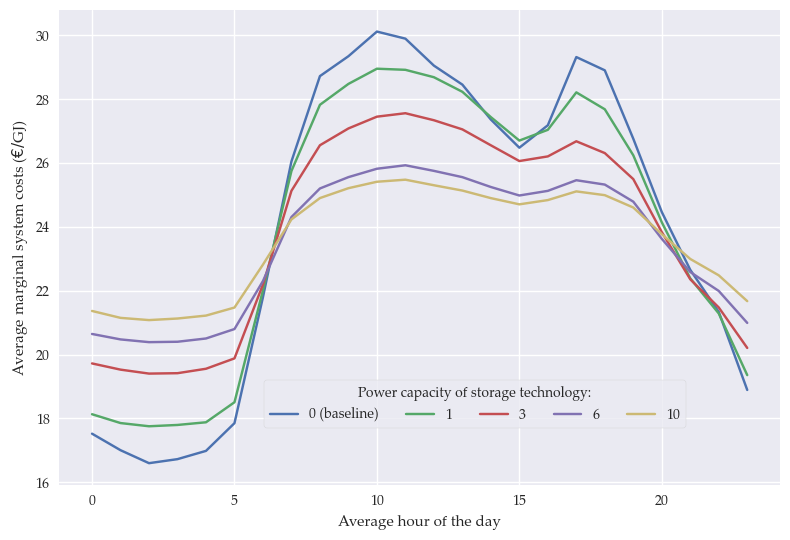

In [28]:
Image(os.path.join(figs_path,'E2.4_sol.png'))

_Note: The code for generating the figure is:_

In [26]:
%%capture
loop_id=loop[[1,3,6,10]]
# Make dataframe
df_p =  pd.concat([
    base_db['marginalSystemCosts'].rename('base').astype(float),
    adj.rc_pd(solution['marginalSystemCosts'],loop_id).unstack('loop').rename_axis(None,axis=1).astype(float)
],axis=1)

# Make new dataframe with time mappings
p_names = df_p.columns.copy()
df = df_p.reset_index().merge(m.db['h2HourOfTheDay'].to_frame(index=False))

# Make plot
fig, ax = plt.subplots()
df.groupby('HourOfTheDay')[p_names].mean().plot(xlabel='Average hour of the day',ylabel=r'Average marginal system costs ($€/$GJ)',ax=ax,legend=False)
fig.legend(['0 (baseline)']+grid_ECap[loop_id].tolist(),loc='lower center', ncol=len(df_fuelineff.columns), frameon=True, bbox_to_anchor=(0.6,0.2),title=r'Power capacity of storage technology:')
fig.tight_layout()
fig.savefig(f"{figs_path}\\E2.4_sol.png", edgecolor='k',bbox_inches='tight')

___
___Answer:___

Wee see that prices are generally increasing in low-price hours and decreasing in high-price hours. This is because the storage technology is charging in low-price states (demand increase pushing up prices) and dispatching in high-price states (supply increase pushing down prices). This can be illustrated by the graph below: 

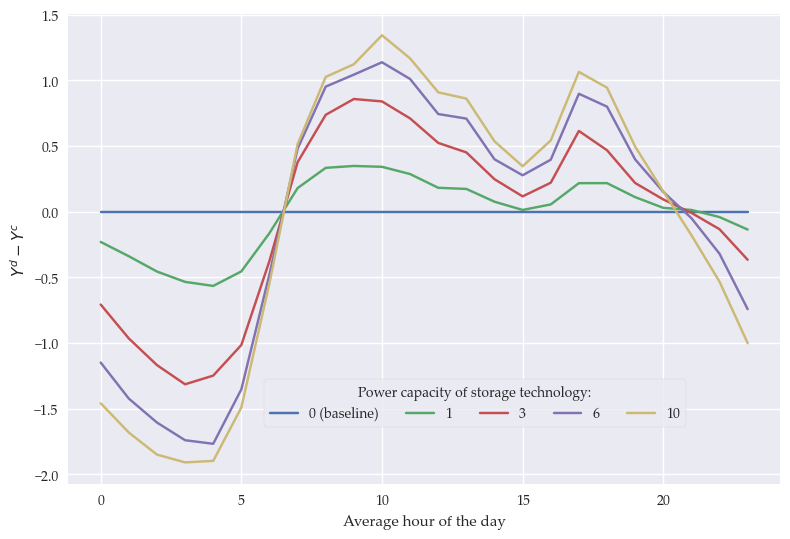

In [29]:
# Make dataframe
charge = adj.rc_pd(-solution['charge'].droplevel('id'),loop_id).unstack('loop').rename_axis(None,axis=1)
discharge = adj.rc_pd(solution['discharge'].droplevel('id'),loop_id).unstack('loop').rename_axis(None,axis=1)

df_Y =  pd.concat([charge,discharge],axis=0).groupby('h').agg('sum')
df_Y['base'] = 0

# Make new dataframe with time mappings
df = df_Y.reset_index().merge(m.db['h2HourOfTheDay'].to_frame(index=False))

# Make plot
fig, ax = plt.subplots()
df.groupby('HourOfTheDay')[p_names].mean().plot(xlabel='Average hour of the day',ylabel=r'$Y^d-Y^c$',ax=ax,legend=False)
fig.legend(['0 (baseline)']+grid_ECap[loop_id].tolist(),loc='lower center', ncol=len(df_fuelineff.columns), frameon=True, bbox_to_anchor=(0.6,0.2),title=r'Power capacity of storage technology:')
fig.tight_layout()

## E2.5

The cunk of code in the following illustrates the marginal economic value of both power capacity (left) and energy capacity (right) of storage using eq. __(1.4.1.1)__ and __(1.4.2.1)__, respectively.

__Explain why the marginal value of power capacity goes to zero and the marginal value of energy storage is still positive (although also decreasing)__.

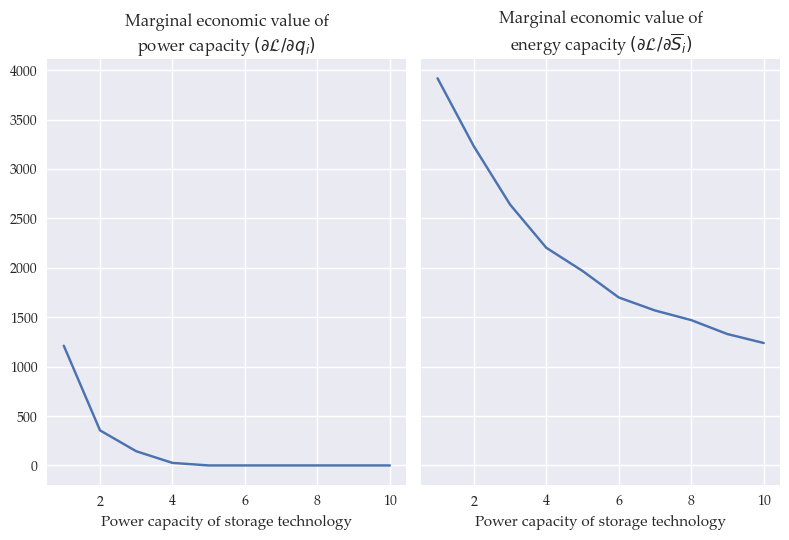

In [33]:
fig, ax = plt.subplots(ncols=2,sharey=True)
solution['marginalEconomicValue'].xs('idES',level='id').xs('Power',level='CapacityType').iloc[1:].plot(ax=ax[0],title='Marginal economic value of\npower capacity $(\partial \mathcal{L} /\partial q_{i})$',xlabel=r'Power capacity of storage technology')
solution['marginalEconomicValue'].xs('idES',level='id').xs('Energy',level='CapacityType').iloc[1:].plot(ax=ax[1],title='Marginal economic value of\nenergy capacity $(\partial \mathcal{L} /\partial \overline{S}_{i})$',xlabel=r'Power capacity of storage technology')
fig.tight_layout()

___
___Answer:___

The marginal economic value of power capacity is decreasing due to the indirect/equilibrium effect identified in eq. __(8)__ in the lecture note on electricity storage: Because the storage technology is eroding oppertunities of price arbitrage, marginally more price arbitration simply lowers the arbitrage opportunity. While this is an equilibrium effect a more conventional interpretation is that the storage technology features diminishing returns to power capacity. This effect implies that there are no short-run profits associated with investing in more power capacity above 5 GJ. 

However, we do see that the marginal value of energy storage is still positive. The intuition is that it would be optimal to invest in a storage technology with a longer storage duration than 4 hours. In other words, when the power capacity is at 5 GJ all arbitrage oppertunities within a typical day are eroded, and we would need a technology for long-term storage to take advantage of other price spreads. 

## E2.7

__Explain why total CO$_2$ emissions are increasing as illustrated by the folloing chunk of code:__

<Axes: xlabel='Power capacity of storage', ylabel='Ton CO$_2$'>

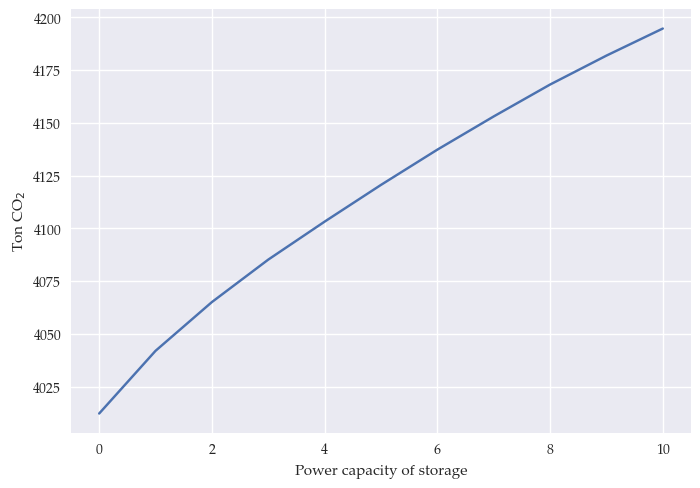

In [50]:
solution['Emissions'].plot(ylabel='Ton CO$_2$',xlabel='Power capacity of storage')

___
___Answer:___

To answer this question, we need to look at what happens to emission in low-price states vs. high-price states:

<Axes: xlabel='Hour of the day', ylabel='kg CO$_2$'>

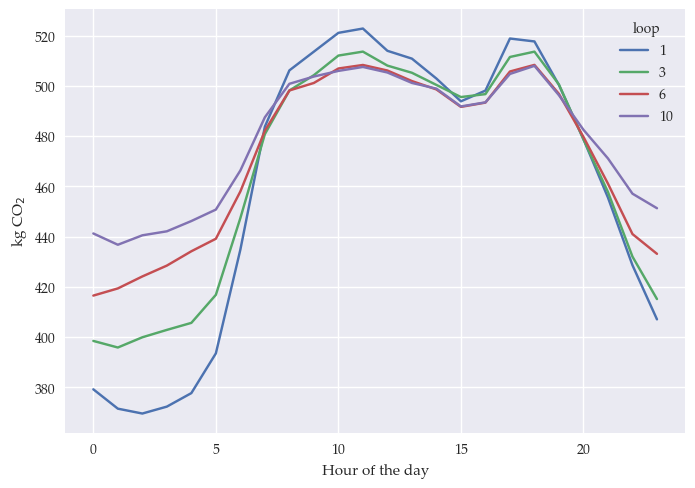

In [51]:
x = solution['hourlyEmissions'].xs('CO2',level='EmissionType').reset_index().merge(m.db['h2HourOfTheDay'].to_frame(index=False))
adj.rc_pd(x.groupby(['HourOfTheDay','loop'])[0].mean(),loop_id).mul(1000).unstack('loop').plot(ylabel='kg CO$_2$',xlabel='Hour of the day')

While we lowering emissions in high-price states in which stored electricity is dispatch in replacing fossil-based generation, we are crowding in emission in low-price states. Specifically, we are crowding in the coal- and natural-gas fired generators, which increases emissions on net due to their high emission intensity.